In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
temp_folder = '/content/drive/My Drive/Course Work/Algo 2014/'

In [4]:
root_folder = temp_folder + 'data'

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root=root_folder, train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root=root_folder, train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting /content/drive/My Drive/Course Work/Algo 2014/data/cifar-10-python.tar.gz to /content/drive/My Drive/Course Work/Algo 2014/data
Files already downloaded and verified


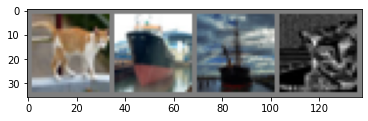

  cat  ship  ship   cat


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [6]:
import torch.nn as nn
import torch.nn.functional as F

In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [8]:
import torch.optim as optim

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [10]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.257
[1,  4000] loss: 1.883
[1,  6000] loss: 1.669
[1,  8000] loss: 1.590
[1, 10000] loss: 1.509
[1, 12000] loss: 1.480
[2,  2000] loss: 1.420
[2,  4000] loss: 1.379
[2,  6000] loss: 1.352
[2,  8000] loss: 1.334
[2, 10000] loss: 1.313
[2, 12000] loss: 1.302
Finished Training


In [11]:
PATH = temp_folder + 'cifar_net.pth'
torch.save(net.state_dict(), PATH)

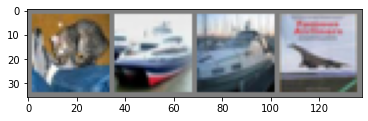

GroundTruth:    cat  ship  ship plane
GroundTruth:  tensor(3) tensor(8) tensor(8) tensor(0)


In [41]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))
print('GroundTruth: ', ' '.join('%5s' % labels[j] for j in range(4)))

In [13]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [14]:
outputs = net(images)

In [15]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship  ship  ship


In [16]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 54 %


In [17]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 51 %
Accuracy of   car : 67 %
Accuracy of  bird : 52 %
Accuracy of   cat : 59 %
Accuracy of  deer : 47 %
Accuracy of   dog : 17 %
Accuracy of  frog : 48 %
Accuracy of horse : 61 %
Accuracy of  ship : 73 %
Accuracy of truck : 63 %


# Backprop

In [19]:
type(images), type(labels)

(torch.Tensor, torch.Tensor)

In [21]:
images.shape, labels.shape

(torch.Size([4, 3, 32, 32]), torch.Size([4]))

In [24]:
type(images[0]), images[0].shape, torch.reshape(images[0], (1, 3, 32, 32)).shape

(torch.Tensor, torch.Size([3, 32, 32]), torch.Size([1, 3, 32, 32]))

In [66]:
new_image = images[0].numpy().reshape((1, 3, 32, 32))
new_tensor = torch.tensor(new_image, requires_grad=True)

new_output = net(new_tensor)
print(f"Output: {new_output}")

current_score = new_output[0][3]
print(f"Current score: {current_score}")

current_score.backward()
print(f"Input derivative: {new_tensor.grad}")
print(f"Input derivative shape: {new_tensor.grad.shape}")
print(f"Input derivative max: {new_tensor.grad.max()}")

Output: tensor([[-1.3778, -0.9516,  0.1959,  2.1577,  0.3443,  1.0624,  0.0334,  0.0602,
         -0.6116, -0.8665]], grad_fn=<AddmmBackward>)
Current score: 2.157653331756592
Input derivative: tensor([[[[ 0.0000e+00, -3.8590e-04,  2.0872e-04,  ..., -9.6790e-04,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00,  2.9906e-04, -1.6793e-03,  ...,  8.1131e-04,
            1.3909e-04,  1.5611e-05],
          [ 0.0000e+00, -1.3527e-03,  9.6680e-04,  ...,  1.8078e-03,
            3.8953e-03,  1.4980e-03],
          ...,
          [-2.9805e-03, -1.1655e-03, -2.4662e-03,  ..., -5.0107e-03,
           -6.8420e-03, -3.3970e-03],
          [-1.0197e-03, -5.2791e-04,  1.9529e-03,  ..., -1.1032e-02,
           -7.8264e-03, -7.5477e-03],
          [ 7.1240e-04, -4.6208e-04, -3.2160e-03,  ...,  2.8356e-03,
            4.4266e-04, -1.9992e-03]],

         [[ 0.0000e+00, -1.0388e-03, -4.6659e-04,  ...,  5.4548e-04,
            0.0000e+00,  0.0000e+00],
          [ 0.0000e+00, -1.4583e-03, -3.